In [1]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.3/967.3 kB 22.4 MB/s eta 0:00:00


2025-04-16 21:59:58.988270: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


 Model loaded from: saved_models/bi_lstm_attention.keras
 Tokenizer loaded!
 Background dataset prepared! Shape: (50, 100)
SHAP DeepExplainer initialized!


 Analyzujem vetu: "it's simple really white people are stupid they do dumb shit like this all the time"
 Sekvencia tvaru: (1, 100)


PermutationExplainer explainer: 2it [00:20, 20.57s/it]               


 SHAP vplyv slov:
<OOV>: 0.0061
simple: -0.0796
really: 0.0459
white: 0.0850
people: -0.0492
are: 0.0683
stupid: 0.0882
they: 0.0917
do: 0.0126
dumb: 0.0347
shit: 0.0020
like: 0.0056
this: -0.0072
all: 0.0001
the: 0.0168
time: -0.0341


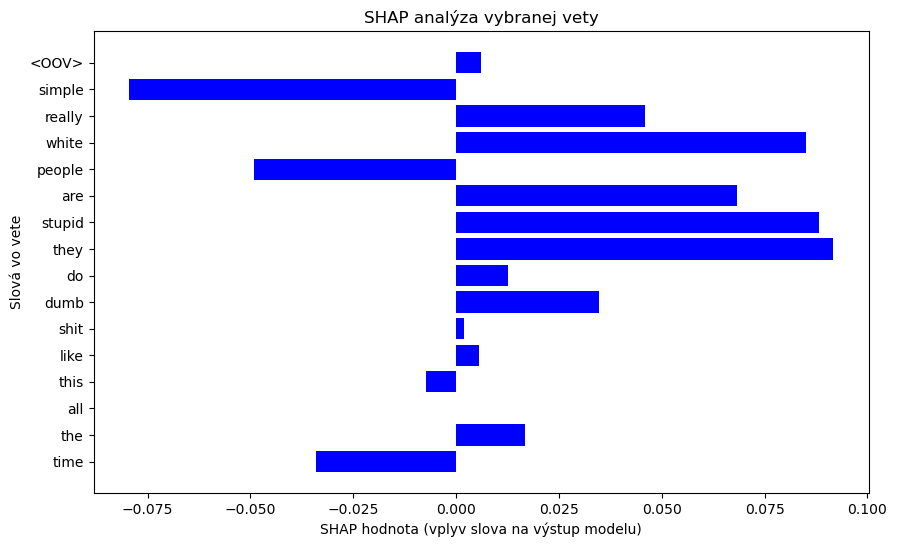

 SHAP analýza dokončená


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

#načítanie natrénovaného modelu BiLSTM Attention
model_filepath = "saved_models/bi_lstm_attention.keras"
model = tf.keras.models.load_model(model_filepath)
print(f" Model loaded from: {model_filepath}")

#načítanie tokenizera
with open("tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)
print(" Tokenizer loaded!")

#načítanie testovacích dát
merged_csv_path = "data/new_merged.csv"
df = pd.read_csv(merged_csv_path)

#výber testovacích príkladov
test_texts = df["text"].tolist()
test_labels = np.array(df["label"].tolist(), dtype=np.int32)

#funkcia na tokenizaciu
max_length = 100  
def tokenize_texts(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_sequences(sequences, maxlen=max_length, padding='post')

#použitie prvých 50 textov
background_texts = test_texts[:50]  
background_sequences = tokenize_texts(background_texts)
background_sequences = np.array(background_sequences)  
print(f" Background dataset prepared! Shape: {background_sequences.shape}")

#definovanie SHAP explainera použitím DeepExplainera
explainer = shap.Explainer(model, background_sequences)
print("SHAP DeepExplainer initialized!\n")

sample_text = "it's simple really white people are stupid they do dumb shit like this all the time"

#tokenizovanie vety
sample_sequence = tokenize_texts([sample_text])
sample_sequence = np.array(sample_sequence)  # Ensure correct shape

print(f"\n Analyzujem vetu: \"{sample_text}\"")
print(f" Sekvencia tvaru: {sample_sequence.shape}")

#vypočet SHAP hodnôt
shap_values = explainer(sample_sequence)
shap_values = shap_values.values[0]

#získanie pôvodných slov
index_to_word = {v: k for k, v in tokenizer.word_index.items()}
words = [index_to_word.get(idx, "<OOV>") for idx in sample_sequence[0] if idx != 0]

#zarovnanie SHAP hodnôt
shap_values = shap_values[:len(words)]

#výpis
print("\n SHAP vplyv slov:")
for word, impact in zip(words, shap_values):
    print(f"{word}: {impact:.4f}")

#vizualizácia
plt.figure(figsize=(10, 6))
plt.barh(words[::-1], shap_values[::-1], color="blue")
plt.xlabel("SHAP hodnota (vplyv slova na výstup modelu)")
plt.ylabel("Slová vo vete")
plt.title("SHAP analýza vybranej vety")
plt.show()

print(" SHAP analýza dokončená")


 Model loaded from: saved_models/bi_lstm_attention.keras
 Tokenizer loaded!
 Background dataset prepared! Shape: (50, 100)
 SHAP DeepExplainer initialized!


 Processing Sentence 1: "what do they do after sex? 25 to life"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:12, 12.57s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
what: -0.0091
do: 0.0464
they: 0.0545
do: 0.0459
after: -0.0126
sex: 0.0343
25: 0.0541
to: -0.0076
life: 0.0577


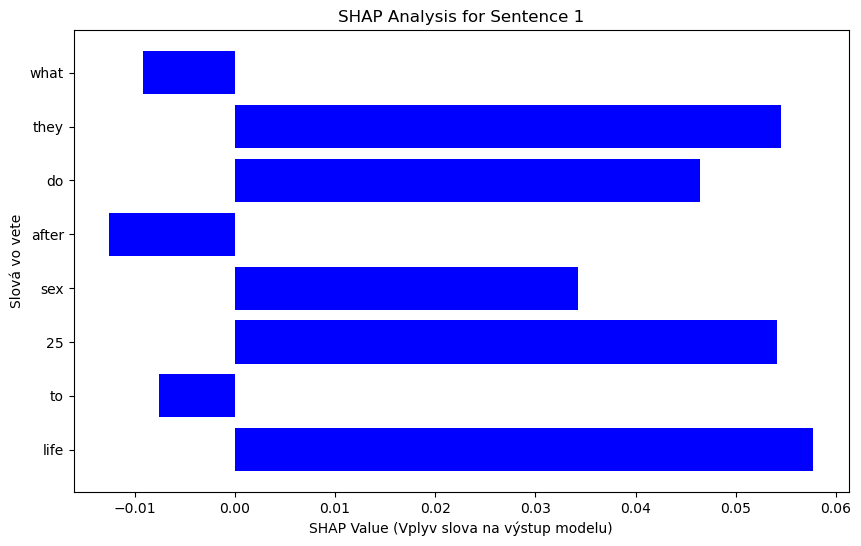


 Processing Sentence 2: "i'm down with that"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:11, 11.66s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
<OOV>: 0.0077
down: 0.1523
with: -0.0303
that: -0.0142


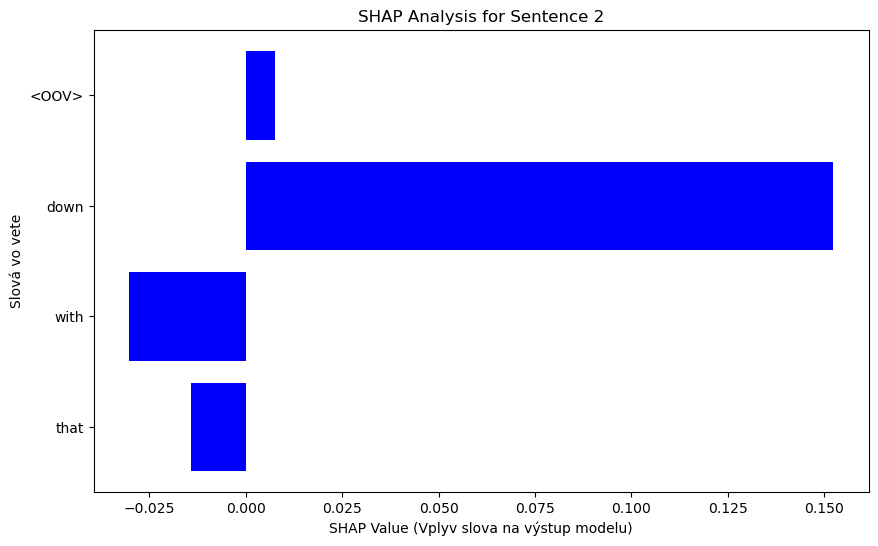


 Processing Sentence 3: "clown bait at its finest "trumps economy is so bad that truck drivers have to buy their own trucks" stacey abrams "democrat response""
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:17, 17.21s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
clown: -0.0625
<OOV>: 0.0204
at: -0.0194
its: 0.1001
<OOV>: 0.0134
trumps: 0.2973
economy: -0.0346
is: -0.0006
so: 0.0191
bad: -0.0382
that: 0.0071
truck: 0.0747
drivers: -0.0054
have: 0.0114
to: -0.0133
buy: -0.0278
their: 0.0142
own: -0.0209
trucks: -0.0279
<OOV>: -0.0043
abrams: -0.0170
democrat: -0.0331
response: 0.0406


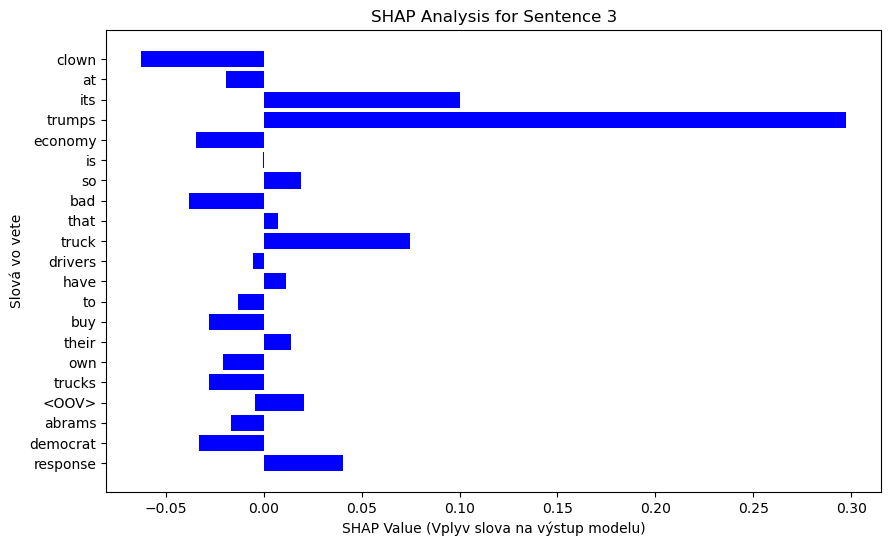


 Processing Sentence 4: "just trying to do my part"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:11, 11.29s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
just: -0.0139
trying: -0.0880
to: -0.0110
do: 0.0418
my: -0.0264
part: 0.1746


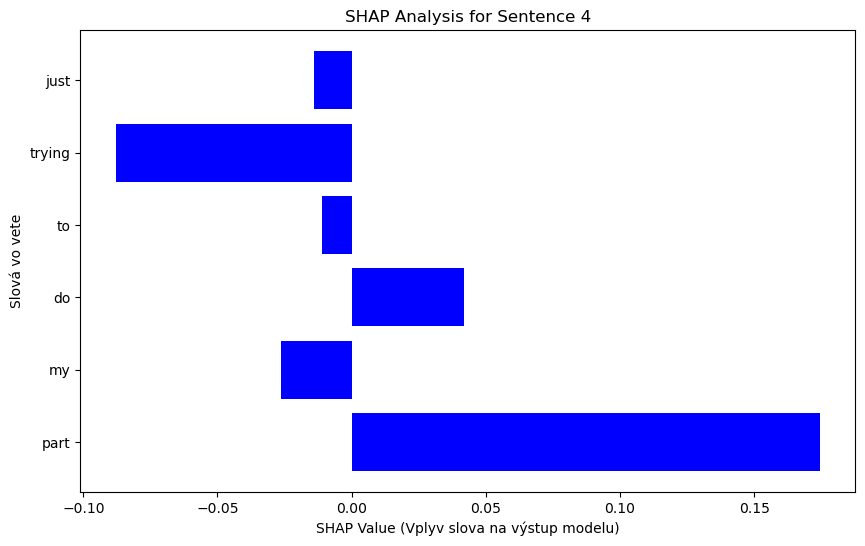


 Processing Sentence 5: "my first act? getting rid of the smell he brought to the house"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:12, 12.86s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
my: -0.0201
first: -0.0259
act: 0.1375
getting: 0.0077
rid: 0.1115
of: -0.0160
the: 0.0030
smell: 0.1443
he: -0.0110
brought: 0.0524
to: -0.0053
the: 0.0102
house: -0.0461


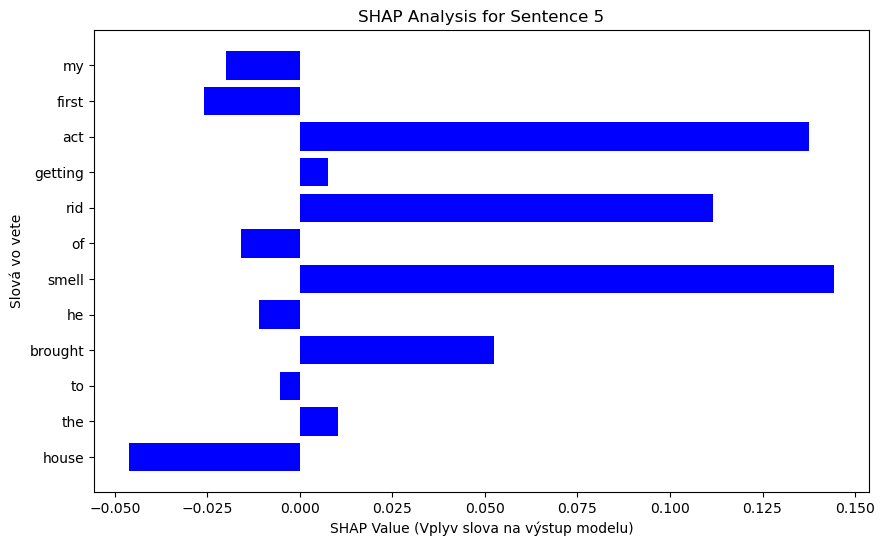


 Processing Sentence 6: "flight attendant: *yawns* deaf passengers:"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:11, 11.56s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
flight: 0.0181
attendant: -0.0517
yawns: -0.0507
deaf: 0.2478
passengers: -0.0789


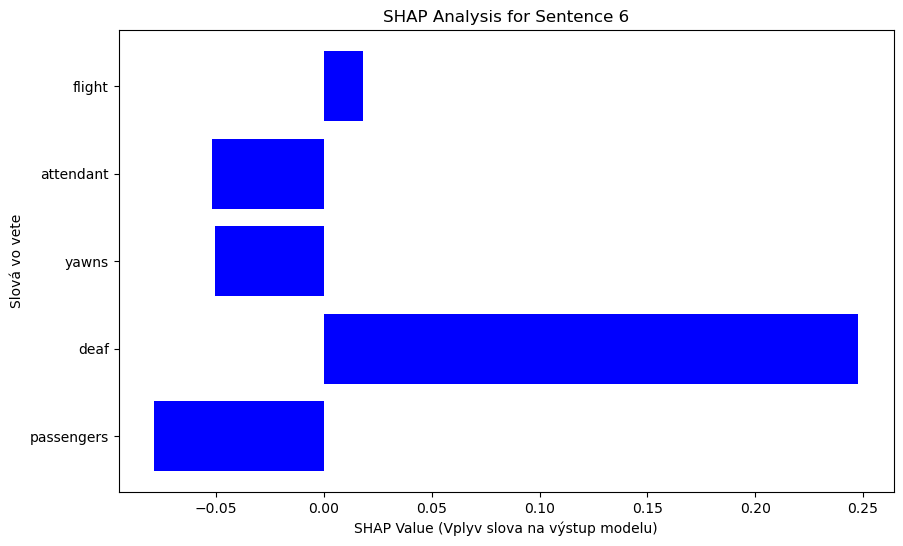


 Processing Sentence 7: "why not share! so i thought fuck it, anjem choudary wants this removed because he says it insults islam"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:16, 16.04s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
why: 0.0385
not: 0.0101
share: 0.0119
so: 0.0499
i: -0.0258
thought: 0.0798
fuck: 0.0214
it: 0.0558
anjem: 0.0004
choudary: -0.0416
wants: -0.0116
this: -0.0054
removed: -0.0552
because: 0.0568
he: 0.0007
says: -0.0134
it: 0.0243
insults: 0.0235
islam: 0.0943


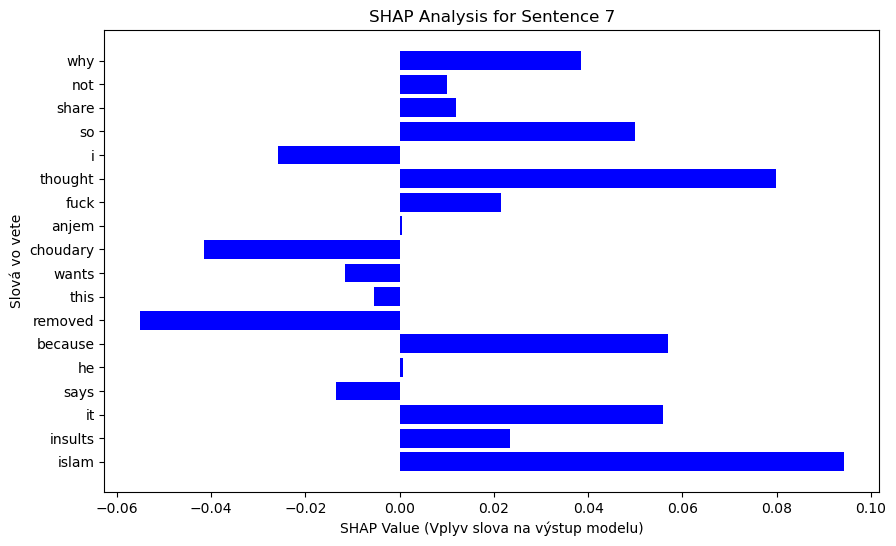


 Processing Sentence 8: "had to get wisdom teeth removed i guess you shouldn't have been such a smart mouth"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:14, 14.27s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
had: 0.0500
to: -0.0303
get: -0.0025
wisdom: -0.1824
teeth: -0.0843
removed: -0.1082
i: -0.0307
guess: -0.0249
you: 0.0023
<OOV>: 0.0022
have: 0.0024
been: 0.0287
such: -0.0843
a: 0.0106
smart: 0.0448
mouth: -0.1226


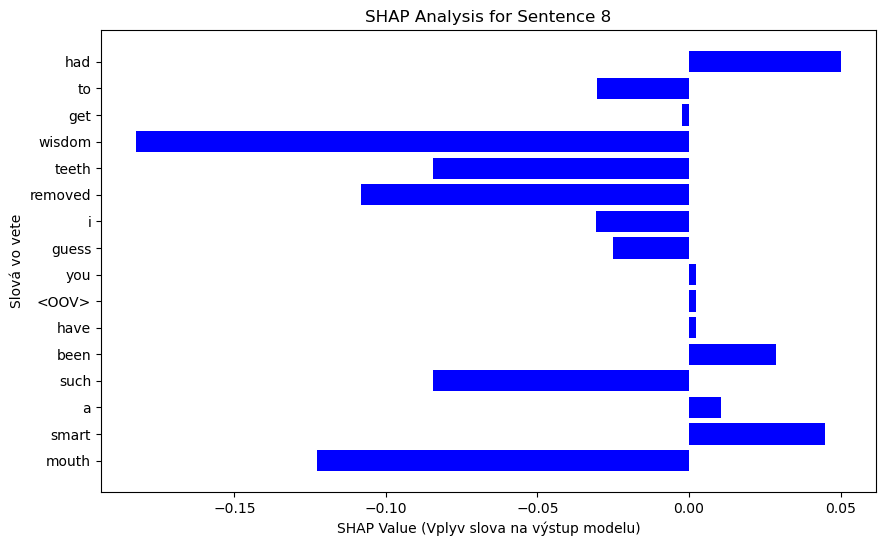


 Processing Sentence 9: "sea lovers"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:11, 11.65s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
sea: -0.0397
lovers: -0.2387


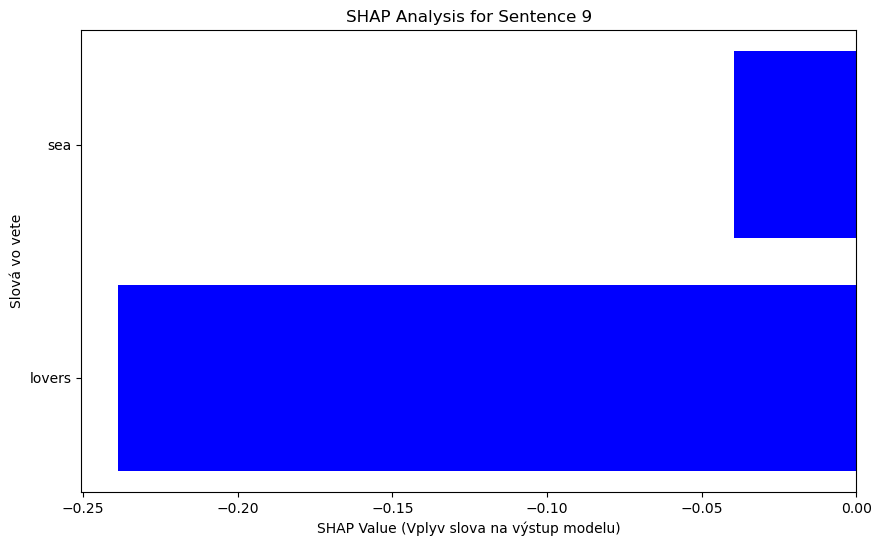


 Processing Sentence 10: "why is it so good? because milk does the body good"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:13, 13.57s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
why: 0.0646
is: -0.0298
it: 0.0851
so: 0.0588
good: -0.0359
because: 0.1233
milk: -0.0080
does: 0.0001
the: 0.0104
body: 0.0204
good: -0.0253


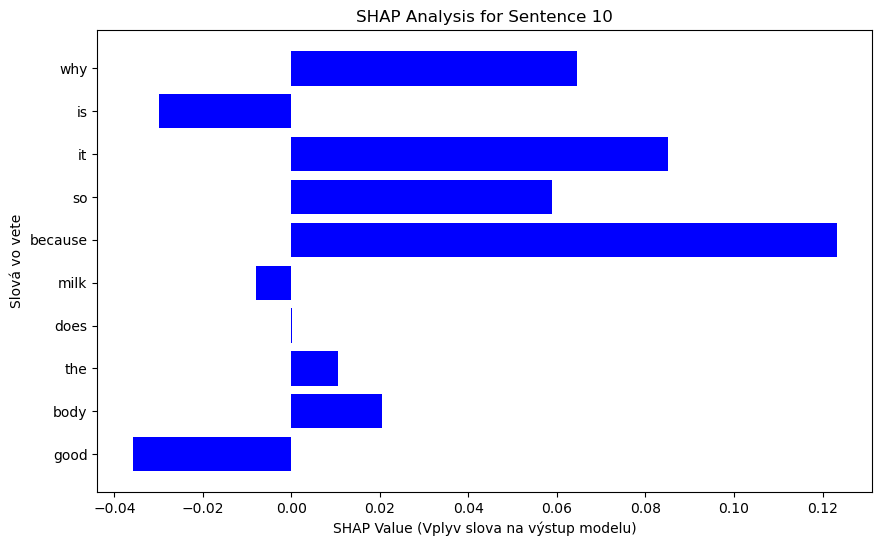


 Processing Sentence 11: "average white "women" average muslim women"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:11, 11.90s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
average: -0.1571
white: 0.0797
women: 0.1295
average: -0.1404
muslim: 0.2801
women: 0.1113


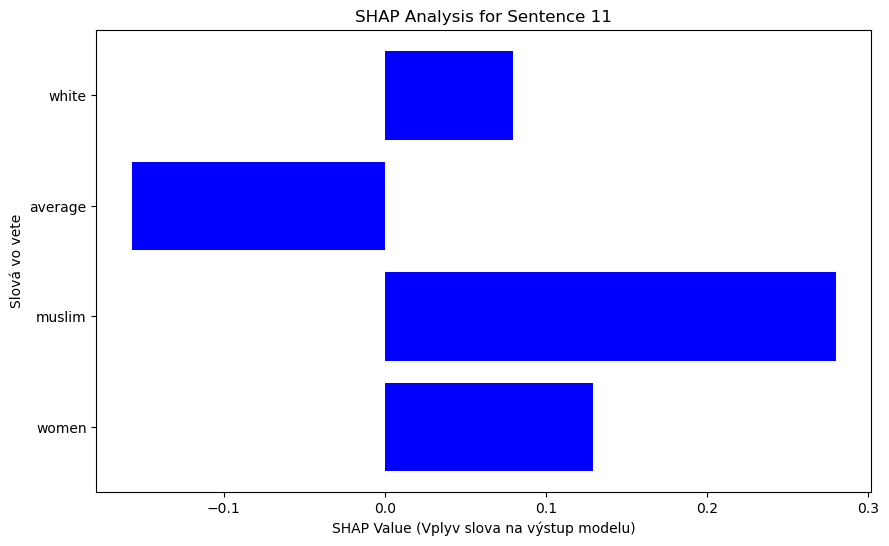


 Processing Sentence 12: "mr. wilson you have to take your pill with water you can't crush it up and snort it off my tits"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:16, 16.76s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
mr: -0.0935
wilson: -0.0371
you: -0.0119
have: -0.0135
to: -0.0231
take: -0.0170
your: -0.0253
pill: -0.1082
with: -0.0162
water: -0.0239
you: 0.0058
<OOV>: -0.0040
crush: -0.0609
it: 0.0459
up: -0.0089
and: 0.0021
snort: -0.0900
it: 0.0293
off: 0.0000
my: -0.0015
tits: -0.0155


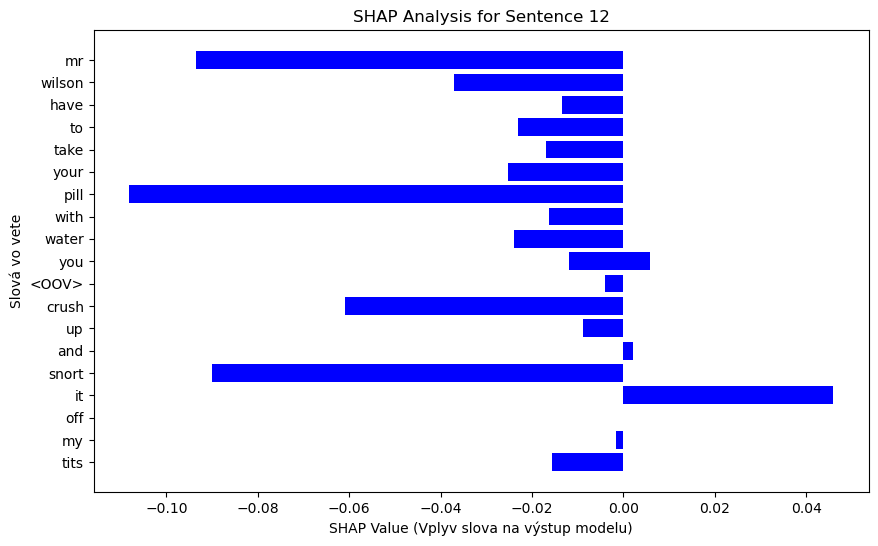


 Processing Sentence 13: "they probably arguing over some little shit"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:12, 12.10s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
they: 0.0159
probably: 0.3091
arguing: -0.0156
over: 0.0148
some: -0.0078
little: 0.0261
shit: -0.0102


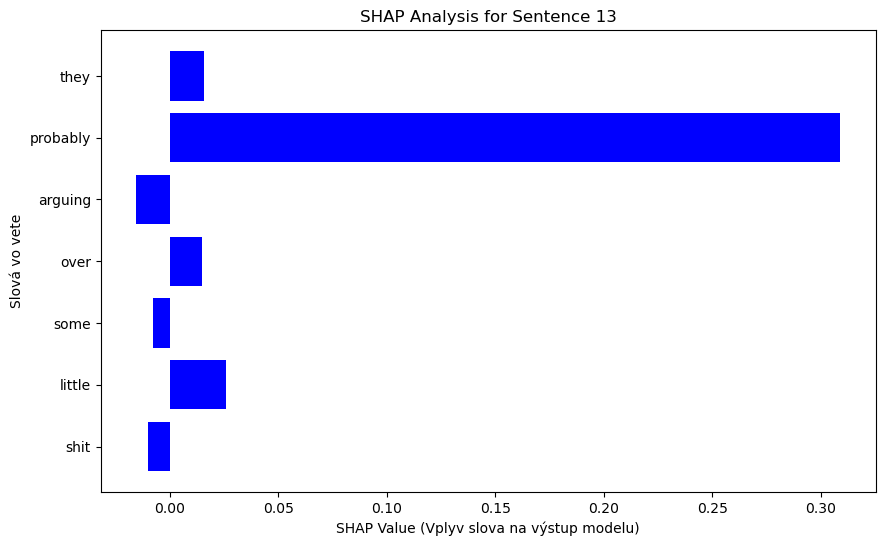


 Processing Sentence 14: "august, 1945: the last words of the would co-pilot moments before he total destruction on hiroshima unleash i hope these rice people like mushrooms!"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:18, 18.41s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
august: 0.0777
1945: 0.0514
the: -0.0162
last: 0.0306
words: 0.1515
of: -0.0268
the: -0.0027
would: -0.0087
co: -0.1600
pilot: 0.1585
moments: -0.0462
before: -0.0041
he: -0.0093
total: 0.0295
destruction: 0.0701
on: 0.0023
hiroshima: -0.0751
<OOV>: -0.0027
i: -0.0087
hope: -0.0828
these: -0.0104
rice: 0.0332
people: -0.0132
like: 0.0054
<OOV>: 0.0037


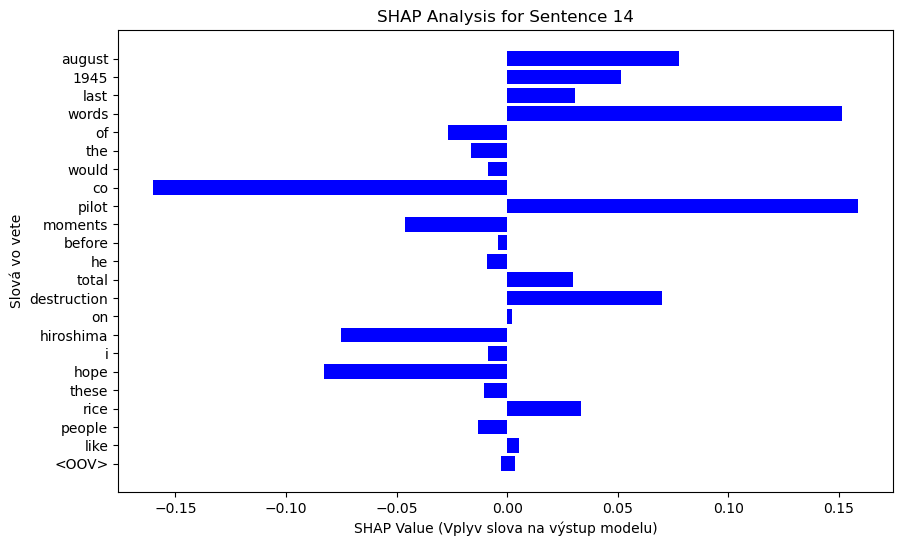


 Processing Sentence 15: "damn bruh ann frank sister thicc af no wonder the holla cost famous for it shower scenes lmao"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:15, 15.53s/it]               


 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
damn: 0.0367
bruh: 0.0275
ann: -0.0881
frank: -0.0453
sister: -0.0205
<OOV>: 0.0124
af: -0.1536
no: 0.0714
wonder: 0.1790
the: 0.0172
holla: 0.0758
cost: 0.1155
famous: -0.1588
for: -0.0070
it: 0.0582
shower: 0.0125
<OOV>: 0.0015
<OOV>: 0.0059


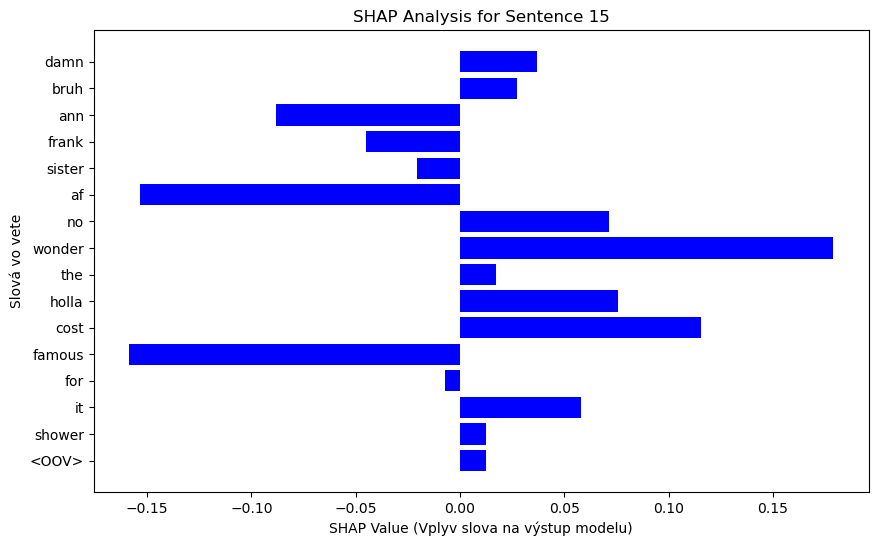


 Processing Sentence 16: "when asked what i did over the weekend i reply, "why, what did you hear"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:13, 13.73s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
when: -0.0569
asked: -0.0031
what: -0.0160
i: -0.0332
did: -0.0779
over: 0.0181
the: -0.0273
weekend: -0.2193
i: -0.0200
<OOV>: 0.0057
why: 0.0429
what: -0.0269
did: -0.0441
you: 0.0089
hear: 0.0218


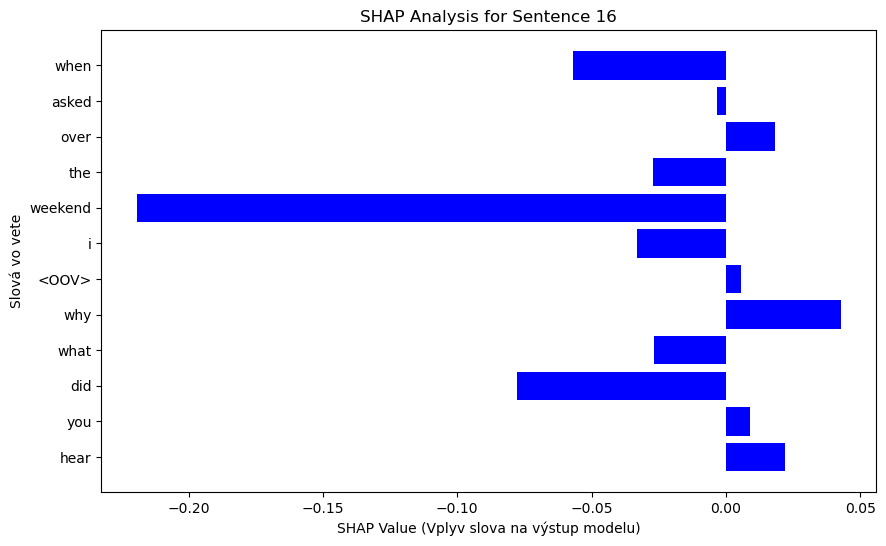


 Processing Sentence 17: "all you guys think about is dope"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:11, 11.62s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
all: -0.0873
you: -0.0137
guys: 0.0328
think: -0.0242
about: -0.0683
is: -0.0419
<OOV>: -0.0075


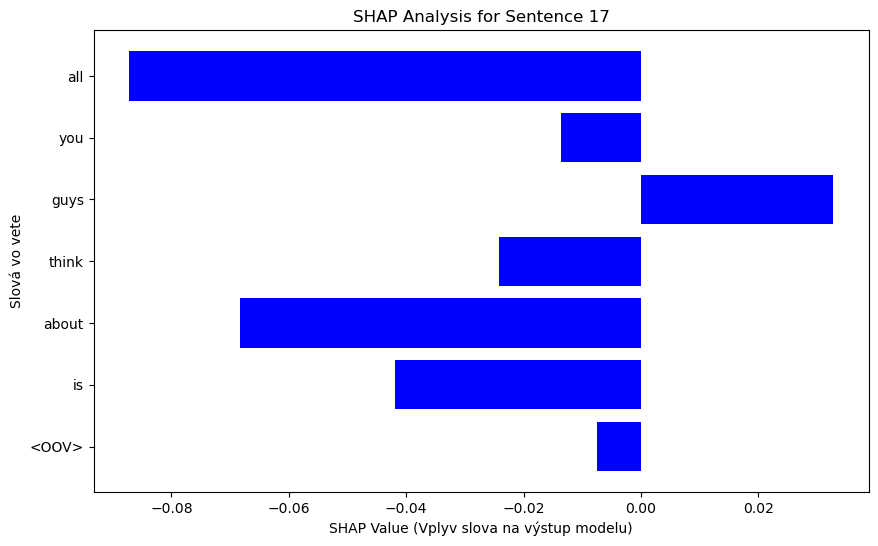


 Processing Sentence 18: "need a hug ? i love hugs"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:11, 11.55s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
need: -0.1219
a: -0.0136
hug: -0.0500
i: -0.0278
love: -0.0586
hugs: -0.1609


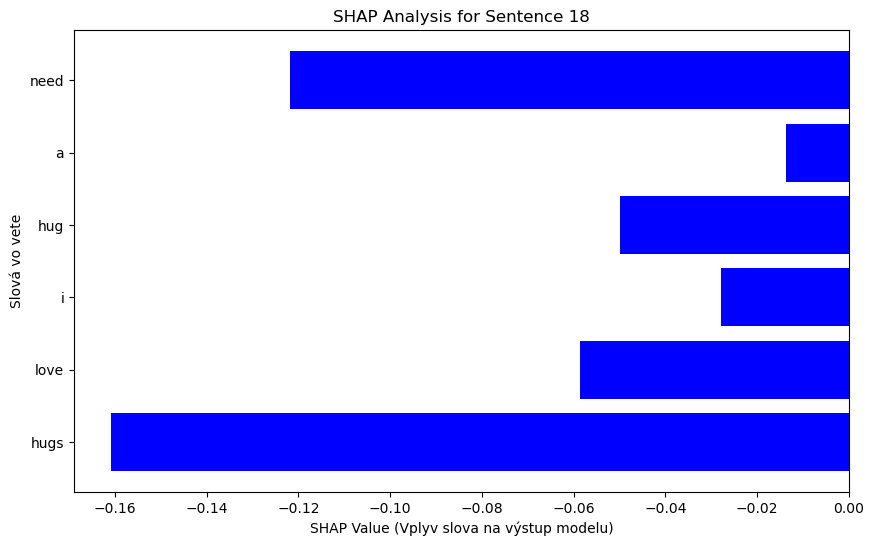


 Processing Sentence 19: "that's black people for you what did you expect?"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:12, 12.30s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
<OOV>: 0.0086
black: 0.2910
people: -0.0363
for: -0.0197
you: -0.0133
what: -0.0174
did: -0.0519
you: 0.0120
expect: 0.1200


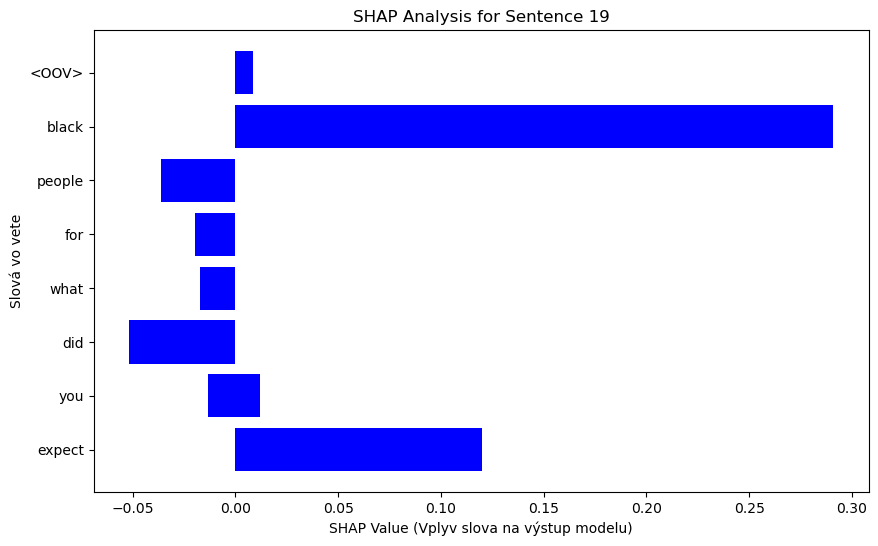


 Processing Sentence 20: "rape helping them have sex for generations"
 Sample sequence shape: (1, 100)


PermutationExplainer explainer: 2it [00:12, 12.16s/it]               

 SHAP values computed! Shape: (100,)

 Word SHAP Impact:
rape: 0.2520
helping: -0.1472
them: 0.1007
have: -0.0034
sex: 0.0078
for: -0.0253
generations: -0.0259


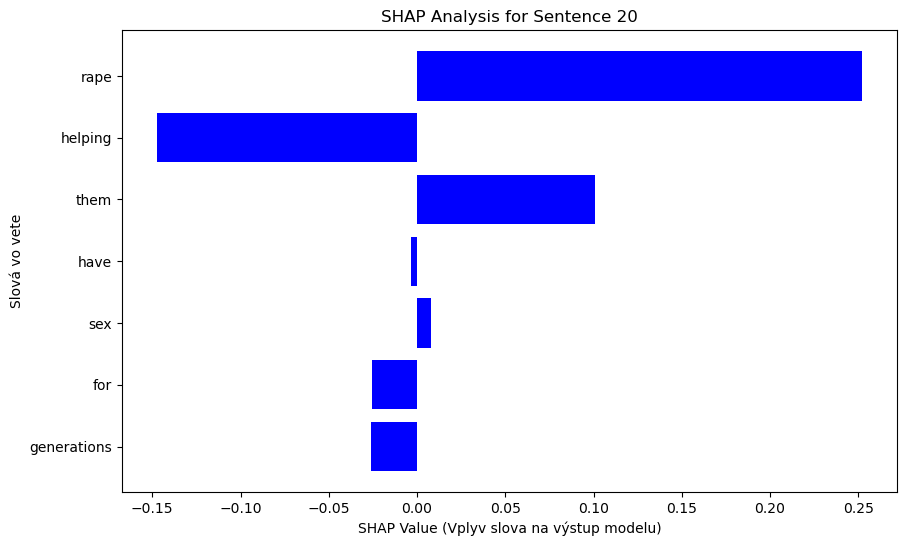

SHAP analysis completed for all 5 sentences!


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

model_filepath = "saved_models/bi_lstm_attention.keras"
model = tf.keras.models.load_model(model_filepath)
print(f" Model loaded from: {model_filepath}")

with open("tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)
print(" Tokenizer loaded!")

merged_csv_path = "data/new_merged.csv"
df = pd.read_csv(merged_csv_path)

test_texts = df["text"].tolist()
test_labels = np.array(df["label"].tolist(), dtype=np.int32)

max_length = 100  
def tokenize_texts(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_sequences(sequences, maxlen=max_length, padding='post')

num_sentences = 20
random_indices = np.random.choice(len(test_texts), num_sentences, replace=False)

background_texts = test_texts[:50]  
background_sequences = tokenize_texts(background_texts)
background_sequences = np.array(background_sequences)  
print(f" Background dataset prepared! Shape: {background_sequences.shape}")

explainer = shap.Explainer(model, background_sequences)
print(" SHAP DeepExplainer initialized!\n")

for i, index in enumerate(random_indices):
    sample_text = test_texts[index]

    sample_sequence = tokenize_texts([sample_text])
    sample_sequence = np.array(sample_sequence)  

    print(f"\n Processing Sentence {i+1}: \"{sample_text}\"")
    print(f" Sample sequence shape: {sample_sequence.shape}")

    shap_values = explainer(sample_sequence)
    shap_values = shap_values.values[0]  

    print(f" SHAP values computed! Shape: {shap_values.shape}")

    index_to_word = {v: k for k, v in tokenizer.word_index.items()}  
    words = [index_to_word.get(idx, "<OOV>") for idx in sample_sequence[0] if idx != 0]

    shap_values = shap_values[:len(words)]  

    print("\n Word SHAP Impact:")
    for word, impact in zip(words, shap_values):
        print(f"{word}: {impact:.4f}")
        
    plt.figure(figsize=(10, 6))
    plt.barh(words[::-1], shap_values[::-1], color="blue")  
    plt.xlabel("SHAP Value (Vplyv slova na výstup modelu)")
    plt.ylabel("Slová vo vete")
    plt.title(f"SHAP Analysis for Sentence {i+1}")
    plt.show()

print("SHAP analysis completed for all 5 sentences!")


/tmp/ipykernel_6332/2384707641.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


 Model loaded from: saved_models/bi_lstm_attention.keras
 Tokenizer loaded!
 Background dataset prepared! Shape: (50, 100)
 SHAP DeepExplainer initialized!



PermutationExplainer explainer: 2it [00:13, 13.41s/it]               


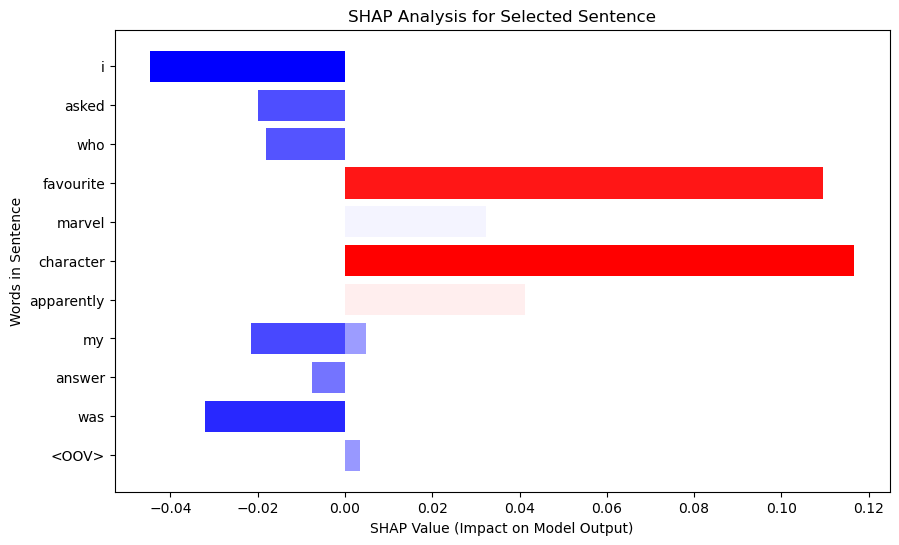

SHAP text visualization and bar plot displayed


In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tensorflow.keras.preprocessing.sequence import pad_sequences
from IPython.core.display import display, HTML

model_filepath = "saved_models/bi_lstm_attention.keras"
model = tf.keras.models.load_model(model_filepath)
print(f" Model loaded from: {model_filepath}")

with open("tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)
print(" Tokenizer loaded!")

merged_csv_path = "data/new_merged.csv"
df = pd.read_csv(merged_csv_path)

test_texts = df["text"].tolist()
test_labels = np.array(df["label"].tolist(), dtype=np.int32)

max_length = 100  
def tokenize_texts(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_sequences(sequences, maxlen=max_length, padding='post')

background_texts = test_texts[:50]  
background_sequences = tokenize_texts(background_texts)
background_sequences = np.array(background_sequences)  
print(f" Background dataset prepared! Shape: {background_sequences.shape}")

explainer = shap.Explainer(model, background_sequences)
print(" SHAP DeepExplainer initialized!\n")

num_sentences = 1  
random_indices = np.random.choice(len(test_texts), num_sentences, replace=False)
sample_text = test_texts[random_indices[0]]

sample_sequence = tokenize_texts([sample_text])
sample_sequence = np.array(sample_sequence)

shap_values = explainer(sample_sequence)
shap_values = shap_values.values[0]  

#tokenizovaný text prevedieme na slová
index_to_word = {v: k for k, v in tokenizer.word_index.items()} 
words = [index_to_word.get(idx, "<OOV>") for idx in sample_sequence[0] if idx != 0]
shap_values = shap_values[:len(words)]  

#normalizácia SHAP hodnôt
norm = mcolors.Normalize(vmin=min(shap_values), vmax=max(shap_values), clip=True)
cmap = plt.cm.bwr  

#vizualizácia
highlighted_text = "".join(
    f'<span style="background-color: {mcolors.to_hex(cmap(norm(value)))}; padding: 2px;">{word}</span> '
    for word, value in zip(words, shap_values)
)

html_output = f"<p style='font-size:16px; font-family:Arial;'>{highlighted_text}</p>"
display(HTML(html_output))

plt.figure(figsize=(10, 6))
plt.barh(words[::-1], shap_values[::-1], color=[mcolors.to_hex(cmap(norm(v))) for v in shap_values[::-1]])
plt.xlabel("SHAP Value (Impact on Model Output)")
plt.ylabel("Words in Sentence")
plt.title("SHAP Analysis for Selected Sentence")
plt.show()

print("SHAP text visualization and bar plot displayed")

/tmp/ipykernel_6332/1206106865.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


 Model loaded from: saved_models/bi_lstm_attention.keras
Tokenizer loaded!
 Background dataset prepared! Shape: (50, 100)
SHAP DeepExplainer initialized!



PermutationExplainer explainer: 2it [00:12, 12.03s/it]               


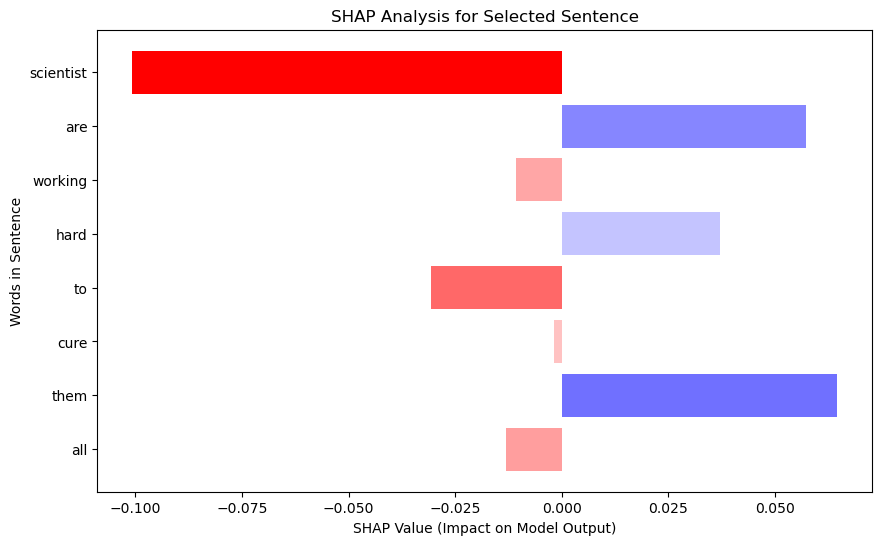

SHAP text visualization and bar plot displayed


In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tensorflow.keras.preprocessing.sequence import pad_sequences
from IPython.core.display import display, HTML

model_filepath = "saved_models/bi_lstm_attention.keras"
model = tf.keras.models.load_model(model_filepath)
print(f" Model loaded from: {model_filepath}")

with open("tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)
print("Tokenizer loaded!")

merged_csv_path = "data/new_merged.csv"
df = pd.read_csv(merged_csv_path)

test_texts = df["text"].tolist()
test_labels = np.array(df["label"].tolist(), dtype=np.int32)

max_length = 100  
def tokenize_texts(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_sequences(sequences, maxlen=max_length, padding='post')

background_texts = test_texts[:50]  
background_sequences = tokenize_texts(background_texts)
background_sequences = np.array(background_sequences)  
print(f" Background dataset prepared! Shape: {background_sequences.shape}")

explainer = shap.Explainer(model, background_sequences)
print("SHAP DeepExplainer initialized!\n")

num_sentences = 1  
random_indices = np.random.choice(len(test_texts), num_sentences, replace=False)
sample_text = test_texts[random_indices[0]]

sample_sequence = tokenize_texts([sample_text])
sample_sequence = np.array(sample_sequence)

shap_values = explainer(sample_sequence)
shap_values = shap_values.values[0]  

index_to_word = {v: k for k, v in tokenizer.word_index.items()}  
words = [index_to_word.get(idx, "<OOV>") for idx in sample_sequence[0] if idx != 0]
shap_values = shap_values[:len(words)]  

norm = mcolors.Normalize(vmin=min(shap_values), vmax=max(shap_values), clip=True)
cmap = plt.cm.bwr  

highlighted_text = "".join(
    f'<span style="background-color: {mcolors.to_hex(cmap(norm(-value)))}; padding: 2px;">{word}</span> '
    for word, value in zip(words, shap_values)
)

html_output = f"<p style='font-size:16px; font-family:Arial;'>{highlighted_text}</p>"
display(HTML(html_output))

plt.figure(figsize=(10, 6))
plt.barh(words[::-1], shap_values[::-1], color=[mcolors.to_hex(cmap(norm(-v))) for v in shap_values[::-1]])
plt.xlabel("SHAP Value (Impact on Model Output)")
plt.ylabel("Words in Sentence")
plt.title("SHAP Analysis for Selected Sentence")
plt.show()

print("SHAP text visualization and bar plot displayed")

In [13]:
# Importovanie potrebných knižníc
import tensorflow as tf
import numpy as np
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

#načítanie uloženého modelu
model_filepath = "saved_models/bi_lstm_attention.keras"
model = tf.keras.models.load_model(model_filepath)
print(f" Model načítaný z: {model_filepath}")

#načítanie tokenizeru, ktorý prevádza text na číselné sekvencie
with open("tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)
print(" Tokenizer načítaný!")

#načítanie testovacích dát
merged_csv_path = "data/new_merged.csv"
df = pd.read_csv(merged_csv_path)

#extrahovanie textov a ich príslušných štítkov
test_texts = df["text"].tolist()
test_labels = np.array(df["label"].tolist(), dtype=np.int32)

#nastavenie maximálnej dĺžky sekvencie pre padding
max_length = 100  

#funkcia na tokenizovanie 
def tokenize_texts(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_sequences(sequences, maxlen=max_length, padding='post')

#výber prvých 50 textov
background_texts = test_texts[:50]  
background_sequences = tokenize_texts(background_texts)
background_sequences = np.array(background_sequences)  
print(f" Dataset pre pozadie pripravený! Tvar: {background_sequences.shape}")

explainer = shap.Explainer(model, background_sequences)
print(" SHAP Explainer inicializovaný!\n")

random_index = np.random.choice(len(test_texts))
sample_text = test_texts[random_index]

#prevod vybraného textu na číselnú sekvenciu 
sample_sequence = tokenize_texts([sample_text])
sample_sequence = np.array(sample_sequence)

shap_values = explainer(sample_sequence)

index_to_word = {v: k for k, v in tokenizer.word_index.items()}  
#konverzia sekvencie späť na slová 
words = [index_to_word.get(idx, "<OOV>") for idx in sample_sequence[0] if idx != 0]
shap_values = shap_values.values[0][:len(words)]  

shap_explanation = shap.Explanation(values=shap_values, base_values=shap_values.mean(), data=words)
shap.plots.text(shap_explanation)

print( "SHAP vizualizácia")


 Model načítaný z: saved_models/bi_lstm_attention.keras
 Tokenizer načítaný!
 Dataset pre pozadie pripravený! Tvar: (50, 100)
 SHAP Explainer inicializovaný!



PermutationExplainer explainer: 2it [00:13, 13.31s/it]               


SHAP vizualizácia
